In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.io as pio

## LEGO Dataset

<img src="https://i.imgur.com/49FNOHj.jpg">

In [2]:
data_themes = pd.read_csv('themes.csv')
data_sets = pd.read_csv('sets.csv')
data_colors = pd.read_csv('colors.csv')

In [3]:
df_themes = data_themes.copy()
df_sets = data_sets.copy()
df_colors = data_colors.copy()

In [4]:
df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


There are 4 columns in this dataset which include the name of the colour, it's correspoinding RGB value and whether it is transparent or not

In [5]:
df_colors['name'].nunique()

135

There are 135 unique colors

In [6]:
df_colors['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

There are 28 transparent colors

In [7]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


This dataset contains a list of LEGO sets. It shows in which year the set was released and the number of parts in the set.

In [8]:
df_sets.sort_values('year')

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


LEGO started in the year 1949

In [9]:
df_sets[df_sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


So, there were 5 different sets in the 1st year for LEGO

In [10]:
df_sets.sort_values('num_parts', ascending=False)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
...,...,...,...,...,...
1782,20216-1,MBA Robot & Micro Designer (Kits 2 - 3 Redesign),2013,432,0
1780,20214-1,MBA Adventure Designer (Kits 7 - 9 Redesign),2013,432,0
6822,5005539-1,Brick Pouch (Yellow),2018,501,0
9026,66319-1,Power Miners 3 in 1 Superpack,2009,439,0


Biggest LEGO had 9987 parts, almost 10000 pieces

In [11]:
sets_by_year = df_sets.groupby('year')

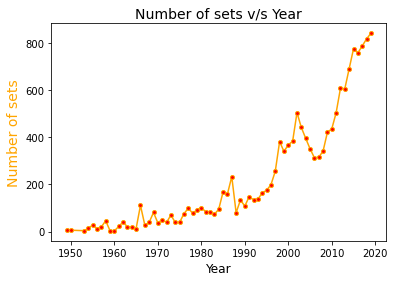

In [12]:
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of sets', fontsize=14, color='orange')
plt.title('Number of sets v/s Year', fontsize=14)
plt.plot(sets_by_year.count().index[:-2], sets_by_year.count()['set_num'][:-2], color='orange', marker='o', markersize=4, markerfacecolor = 'red')

We can see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

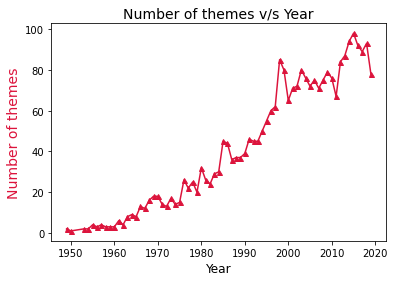

In [13]:
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of themes', fontsize=14, color='crimson')
plt.title('Number of themes v/s Year', fontsize=14)
plt.plot(sets_by_year['theme_id'].nunique()[:-2] ,color = 'crimson',marker = '^', markersize=5)

In the chart, we can see LEGO has consistently added more and more themes, until late 1990's. After that for 10 years number of themes were stagnated untill early 2010's

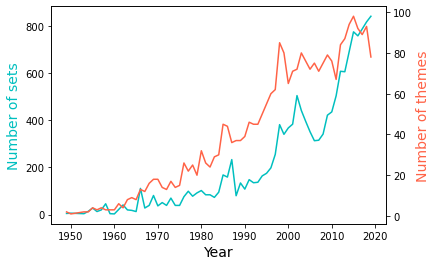

In [14]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('Number of sets', color='c', fontsize=14)
ax2.set_ylabel('Number of themes', color='tomato', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.plot(sets_by_year.count().index[:-2], sets_by_year.count()['set_num'][:-2], color='c')
ax2.plot(sets_by_year['theme_id'].nunique()[:-2] ,color = 'tomato')

In [15]:
sets_by_year.mean()['num_parts']

year
1949     99.600000
1950      1.000000
1953     13.500000
1954     12.357143
1955     36.607143
           ...    
2017    221.840967
2018    213.618873
2019    207.510714
2020    259.732938
2021      0.000000
Name: num_parts, Length: 71, dtype: float64

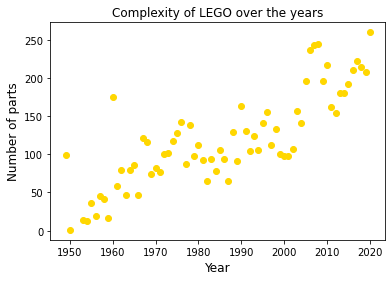

In [16]:
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of parts', fontsize=12)
plt.title('Complexity of LEGO over the years')
plt.scatter(sets_by_year.mean()['num_parts'][:-1].index, sets_by_year.mean()['num_parts'][:-1].values, color='gold')

From the scatterplot, it is evident that we can make out an upward trend in the complexity of LEGO sets over the years

In [17]:
themes_df = df_themes.copy()

In [18]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [19]:
themes_df.drop('parent_id', axis=1, inplace=True)

In [20]:
themes_df.columns = ['theme_id', 'theme_name']

In [21]:
df_merged = pd.merge(df_sets, themes_df, on='theme_id')

In [22]:
df_merged.head()

,set_num,name,year,theme_id,num_parts,theme_name
0,001-1,Gears,1965,1,43,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic
4,1039-1,Manual Control Set 1,1986,1,39,Technic


In [23]:
df_merged.drop(['set_num', 'num_parts'], axis=1, inplace=True)

In [24]:
df_merged['theme_name'].value_counts()[:10]

Star Wars       776
Gear            656
Basic Set       558
Supplemental    535
Technic         453
Friends         415
Ninjago         360
Town            360
Key Chain       329
Books           310
Name: theme_name, dtype: int64

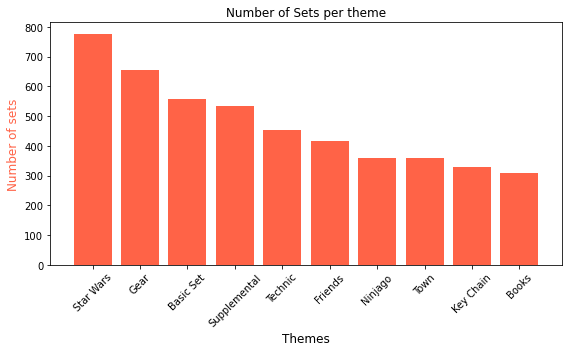

In [25]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.bar(df_merged['theme_name'].value_counts()[:10].index, df_merged['theme_name'].value_counts()[:10].values, color='tomato')
plt.xlabel('Themes', fontsize=12)
plt.ylabel('Number of sets', fontsize=12, color='tomato')
plt.title('Number of Sets per theme')
plt.tight_layout()

From this chart we can see the distribution of sets across different themes

## -----------------------------------------------------------------------------------------------------------------

## Analysing android app store

In [26]:
df_apps = pd.read_csv('apps.csv')

In [27]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


This dataset contains information related to  apps on play store

In [28]:
df_apps.drop(['Android_Ver', 'Last_Updated'], axis=1, inplace=True)

These columns won't be required in analysis

In [29]:
df_apps.shape

(10841, 10)

### Treating missing values

In [30]:
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [31]:
df_apps.dropna(inplace=True)

In [32]:
df_apps.shape

(9367, 10)

In [33]:
df_apps.drop_duplicates(subset=['App', 'Type', 'Price'], inplace=True)

In [34]:
df_apps.sort_values(['Rating', 'Reviews'], ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2095,Ríos de Fe,LIFESTYLE,5.0,141,15.0,"1,000",Free,0,Everyone,Lifestyle
2438,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.3,"1,000",Free,0,Everyone,Finance
3115,Oración CX,LIFESTYLE,5.0,103,3.8,"5,000",Free,0,Everyone,Lifestyle
2107,Barisal University App-BU Face,FAMILY,5.0,100,10.0,"1,000",Free,0,Everyone,Education
2069,Master E.K,FAMILY,5.0,90,19.0,"1,000",Free,0,Everyone,Education
...,...,...,...,...,...,...,...,...,...,...
728,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0,50,Paid,$1.49,Everyone,Education
1208,Thistletown CI,PRODUCTIVITY,1.0,1,6.6,100,Free,0,Everyone,Productivity
1271,MbH BM,MEDICAL,1.0,1,2.3,100,Free,0,Everyone,Medical
1314,CR Magazine,BUSINESS,1.0,1,7.8,100,Free,0,Everyone,Business


In [35]:
df_apps['Content_Rating'].value_counts()

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

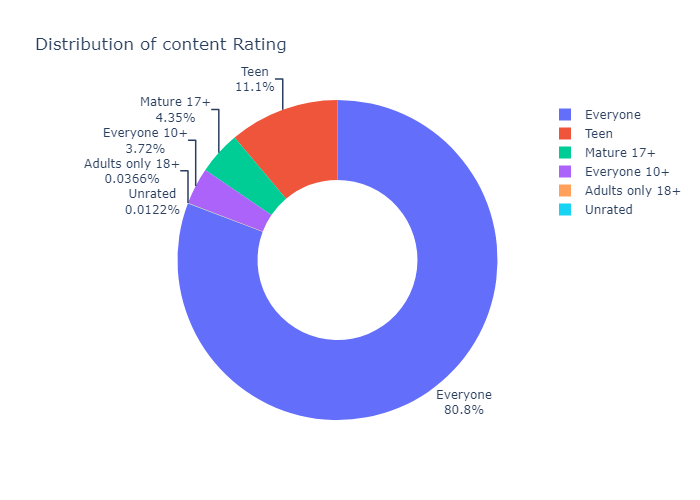

In [36]:
g = px.pie(df_apps['Content_Rating'].value_counts().index, values = df_apps['Content_Rating'].value_counts().values,
      hole=0.5, names=df_apps['Content_Rating'].value_counts().index, title='Distribution of content Rating')
g.update_traces(textposition='outside', textinfo='label+percent')
g.show('png')

### Converting data to numeric type

In [37]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [38]:
df_apps.Installs = df_apps.Installs.astype(str).str.replace(',', "")
df_apps.Installs = pd.to_numeric(df_apps.Installs)
df_apps[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


### Finding the most expensive apps

In [39]:
df_apps.Price = df_apps.Price.astype(str).str.replace('$', "")
df_apps.Price = pd.to_numeric(df_apps.Price)
df_apps.sort_values('Price', ascending=False).head(20)

C:\Users\Gunwant\AppData\Local\Temp/ipykernel_18016/2128040944.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000000,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.1,1867,4.700000,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.1,129,2.700000,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance


There are 15 I am Rich Apps in the Google Play Store apparently. They all cost 300 or more, which is the main point of the app. The story goes back in 2008, Armin Heinrich released the very first I am Rich app in the iOS App Store for $999.90. The app does absolutely nothing. It just displays the picture of a gemstone and can be used to prove to your friends how rich you are. Armin actually made a total of 7 sales before the app was hastily removed by Apple. Nonetheless, it inspired a bunch of copycats on the Android App Store, but if you search today, you’ll find all of these apps have disappeared as well. The high installation numbers are likely gamed by making the app was available for free at some point to get reviews and appear more legitimate.


### Lets check which is the best category to release an app

In [40]:
df_apps = df_apps[df_apps['Price'] < 250]
df_apps.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.0,6,1.3,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.2,134,1.8,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.2,64,41.0,1000,Paid,29.99,Everyone,Medical


In [41]:
df_apps['Category'].value_counts()[:10]

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

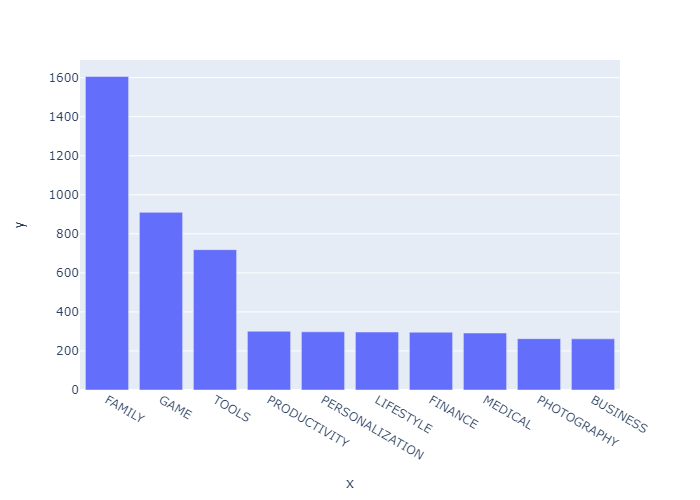

In [42]:
bar_categ = px.bar(x = df_apps['Category'].value_counts()[:10].index,y = df_apps['Category'].value_counts()[:10].values)
bar_categ.show('png')

Based on the number of apps, the Family and Game categories are the most competitive. Releasing yet another app into these categories will make it hard to get noticed.

Lets check number of downloads per category

In [43]:
category_installs = df_apps.groupby('Category')['Installs'].sum().sort_values()

In [44]:
h_bar = px.bar(x = category_installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

Now we see that Games and Tools are actually the most popular categories.

If we plot the popularity of a category next to the number of apps in that category we can get an idea of how concentrated a category is.

In [45]:
category_apps = df_apps.groupby('Category')['App'].count()

In [46]:
cat_merged_df = pd.merge(category_apps, category_installs, on='Category')

In [47]:
cat_merged_df

,App,Installs
Category,,
ART_AND_DESIGN,61,114233100
AUTO_AND_VEHICLES,73,53129800
BEAUTY,42,26916200
BOOKS_AND_REFERENCE,169,1665791655
BUSINESS,262,692018120
COMICS,54,44931100
COMMUNICATION,257,11039241530
DATING,134,140912410
EDUCATION,118,352852000


In [48]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                     yaxis = dict(type='log'))
 

What we see is that the categories like Family, Tools, and Game have many different apps sharing a high number of downloads. But for the categories like video players and entertainment, all the downloads are concentrated in very few apps.

In [49]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0.00,Everyone,Medical


In [50]:
df_apps['Genres'].value_counts()

Tools                                718
Entertainment                        467
Education                            429
Productivity                         301
Personalization                      298
                                    ... 
Adventure;Brain Games                  1
Travel & Local;Action & Adventure      1
Art & Design;Pretend Play              1
Music & Audio;Music & Video            1
Lifestyle;Pretend Play                 1
Name: Genres, Length: 114, dtype: int64

In [51]:
# Here we have nested data
# We have to split this data to get clearer picture

stack = df_apps.Genres.str.split(';', expand=True).stack()

In [52]:
stack.nunique()

53

So we have 53 unique Genres

In [53]:
bar = px.bar(x=stack.value_counts().index[:10],
      y=stack.value_counts().values[:10],
      color=stack.value_counts().values[:10],
      color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)

This chart shows number of apps across different Genres

Now that we’ve looked at the total number of apps per category and the total number of apps per genre, let’s see what the split is between free and paid apps.

In [54]:
df_apps.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [55]:
Type_counts = pd.DataFrame(df_apps.groupby(['Category', 'Type'])['App'].count())

In [56]:
Type_counts.head()

App
Category          Type     
ART_AND_DESIGN    Free   58
                  Paid    3
AUTO_AND_VEHICLES Free   72
                  Paid    1
BEAUTY            Free   42

In [57]:
Type_counts.reset_index(inplace=True)

In [58]:
Type_counts.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [59]:
type_bar = px.bar(x=Type_counts.Category, y=Type_counts.App, color=Type_counts.Type, barmode='group')
type_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                     yaxis=dict(type='log'))

What we see is that while there are very few paid apps on the Google Play Store, some categories have relatively more paid apps than others, including Personalization, Medical and Weather. So, depending on the category you are targeting, it might make sense to release a paid-for app.

In [60]:
box = px.box(df_apps, y='Installs', x='Type', color='Type', notched=True)
box.update_layout(yaxis=dict(type='log'))

From the hover text in the chart, we see that the median number of downloads for free apps is 500,000, while the median number of downloads for paid apps is around 5,000! This is massively lower.

## ------------------------------------------------------------------------------------------------------------------